<a href="https://colab.research.google.com/github/HosseinEyvazi/Supervised-Learning/blob/main/1_Preprocessing_Regression_Wine_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler  , MinMaxScaler
from sklearn.model_selection import train_test_split # this should be in preprocessing (based on that concept) :D . anyway...
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
import math

# Wine Dataset (alcohol target)

In [2]:
wine = load_wine()
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [3]:
df  = pd.DataFrame(wine.data , columns = wine.feature_names)
df.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
86,12.16,1.61,2.31,22.8,90.0,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0
162,12.85,3.27,2.58,22.0,106.0,1.65,0.60,0.60,0.96,5.58,0.87,2.11,570.0


## Data Understanding

In [4]:
df.shape

(178, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## EDA - descriptive

In [7]:
df.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [8]:
cr  = df.corr()
cr.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351


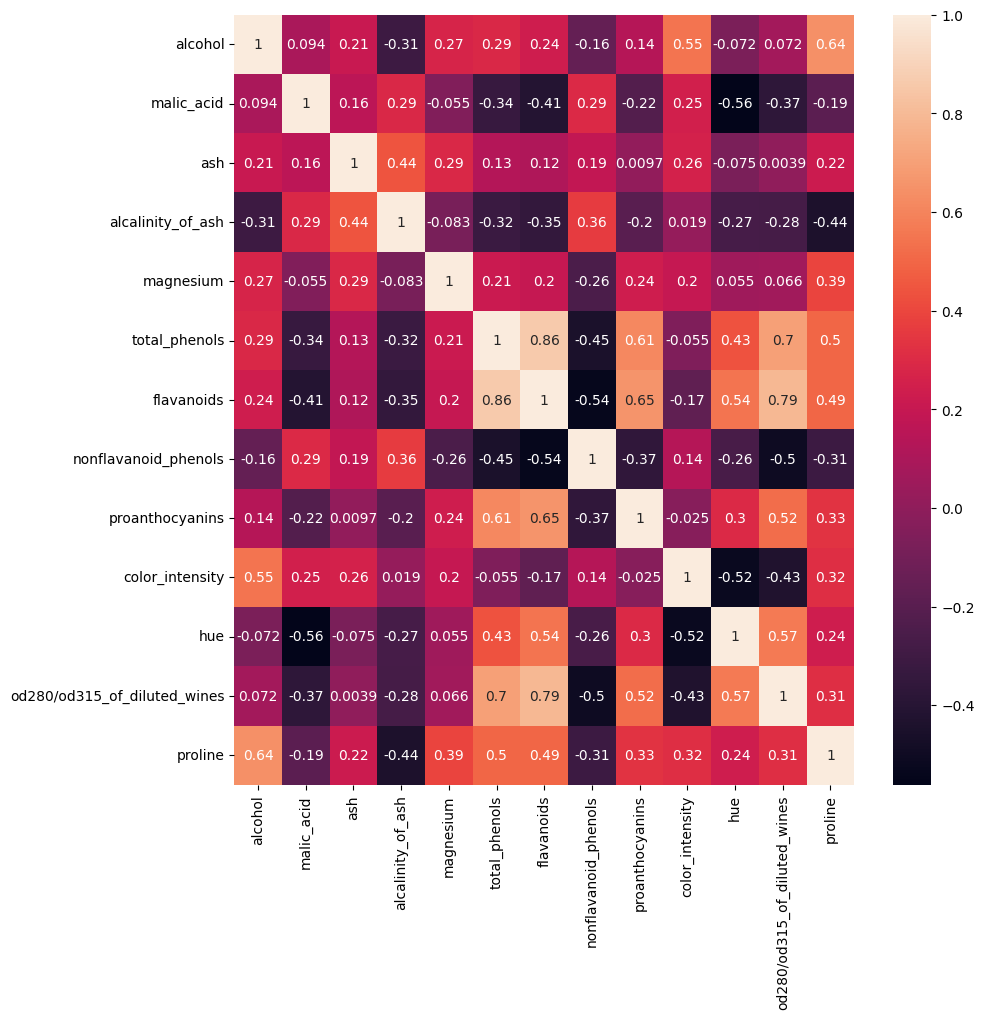

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(cr , annot = True);

In [10]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
173,False
174,False
175,False
176,False


# EDA -Viz

<Figure size 150000x150000 with 0 Axes>

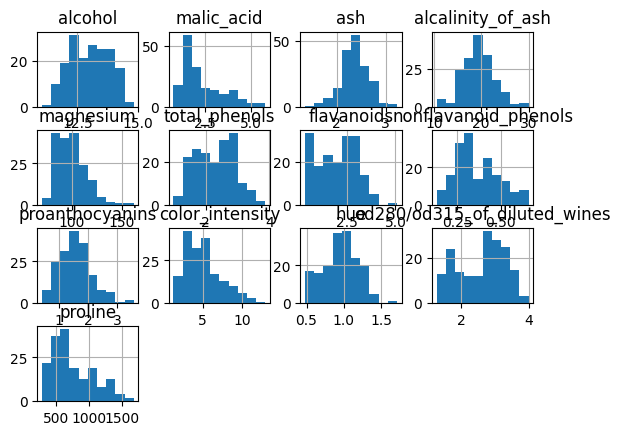

In [19]:
# Good practice for large, high-quality plots:
plt.figure(figsize=(500,500), dpi=300)  # increases resolution
df.hist()

plt.show()


## Preprocessing

### categorical to numeric -> in this Dataset we have not got any categorical features

### train test split

In [12]:

# train_test split
y = df['alcohol']
X = df.drop('alcohol' , axis = 1)
X_train , X_test , y_train , y_test = train_test_split (X ,
                                                        y ,
                                                        test_size = .2 ,
                                                        random_state=42
                                                        )

### scaling -> to avoid setting big weights to features that are very small (and vice-versa) -> big size weigth make model convergance speed lower -> refer to GD


In [13]:
mms = MinMaxScaler()
mms.fit(X_train) # this learns min and max of dataset
X_train = mms.transform(X_train)
X_test = mms.transform(X_test) # why do we scale test by train information ?
# note : we didnt scale y(s) -> y has not got weight


## training model

In [14]:

knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train , y_train)
y_pred = knn_reg.predict(X_test)


## model evaluation

In [15]:

r2 = r2_score( y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
r2 , mse , mae
# why MSE is lower than MAE -> because we scaled the dataset (0-1)

(0.7535277161449876, 0.14715277777777802, 0.2981666666666669)

## iterative model training
note : higher r2 score is better unlike MSE , MAE

In [16]:
# r2_list=[]
for i in range (1,math.floor(df.shape[0]/5)):
  knn_reg = KNeighborsRegressor(n_neighbors=i)
  knn_reg.fit(X_train , y_train)
  y_pred = knn_reg.predict(X_test)
  r2 = r2_score(  y_test , y_pred)
  # r2_list.append((i,r2))
  print(f'for neighbor {i} , r2 = {r2}')


for neighbor 1 , r2 = 0.38123476268561374
for neighbor 2 , r2 = 0.6603777096313268
for neighbor 3 , r2 = 0.7447590875911653
for neighbor 4 , r2 = 0.7554396501543632
for neighbor 5 , r2 = 0.7535277161449876
for neighbor 6 , r2 = 0.7470692402176181
for neighbor 7 , r2 = 0.7673021154185298
for neighbor 8 , r2 = 0.7560851277995818
for neighbor 9 , r2 = 0.7187769320357478
for neighbor 10 , r2 = 0.6941075405449558
for neighbor 11 , r2 = 0.6964783882227136
for neighbor 12 , r2 = 0.6932213272256567
for neighbor 13 , r2 = 0.6857862737785191
for neighbor 14 , r2 = 0.6920671931724851
for neighbor 15 , r2 = 0.696455699867039
for neighbor 16 , r2 = 0.6888911521025167
for neighbor 17 , r2 = 0.7017150354867705
for neighbor 18 , r2 = 0.703735501360057
for neighbor 19 , r2 = 0.7094751971051954
for neighbor 20 , r2 = 0.7066224353751769
for neighbor 21 , r2 = 0.7214115160600048
for neighbor 22 , r2 = 0.721101065412111
for neighbor 23 , r2 = 0.721303563380135
for neighbor 24 , r2 = 0.7230738464357864
for 

## but this is not a good solution
because number of hyperparameters are bigger than 1 \
solution :